# Latent Dirichlet Allocation

LDA is a method of vectorizing text data.

It is a good method for text data that is not too large.

we use LDA to find the most important words in the document.

So we can know the topic of the document.


In [71]:
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [72]:
data = pd.read_csv("news_articles.csv")
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


### First we need to Clean the Data

In [73]:
ps = PorterStemmer()
en_stopwords = set(stopwords.words("english"))

def nltk_preprocess(text):
    text = re.sub(r"([^\w\s])", "", text.lower())
    return [
        ps.stem(t) 
        for t in word_tokenize(text) 
        if t not in en_stopwords
    ]

articles_nltk = data["content"].apply(
    lambda x:nltk_preprocess(x)
)
articles_nltk

0     [dr, frank, sack, professor, nutrit, harvard, ...
1     [south, carolina, win, duke, surpris, fan, pos...
2     [want, get, brief, email, here, good, even, he...
3     [banjul, gambia, week, inaugur, anoth, countri...
4     [biggest, book, summer, isnt, blockbust, thril...
                            ...                        
95    [want, get, brief, email, here, good, even, he...
96    [tallinn, estonia, guard, brought, ahm, abdul,...
97    [gov, scott, walker, wisconsin, activ, wiscons...
98    [social, media, shook, emot, headlin, shout, n...
99    [moment, joanna, acevedo, first, set, foot, bo...
Name: content, Length: 100, dtype: object

# vectorization

In [74]:
from gensim import corpora, models

1 creat a dictionary

 result : 
 
 [('word', how many times it appears in the article),
 
  ('article', 2), ('word', 3)]


In [75]:

dictionary=corpora.Dictionary(articles_nltk)
print(dictionary)

Dictionary<8691 unique tokens: ['10', '100', '108', '15', '155']...>


# vectorization using bag of words

[(ID,how many times appears in the article)]

In [76]:
doc_term=[
  dictionary.doc2bow(text) 
  for text in articles_nltk
]
doc_term

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 3),
  (21, 3),
  (22, 1),
  (23, 3),
  (24, 2),
  (25, 4),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 2),
  (49, 1),
  (50, 2),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 6),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 4),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 5),
  (71, 4),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 2),
  (77, 1),
  (78, 2),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 4),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 3),
  (90, 1),
  (91, 2)

# LDA

In [77]:
num_topics=2

Train the topic model using Latent Dirichlet Allocation (LDA)
This model discovers hidden topics in a collection of documents.

    corpus : The bag-of-words representation of the documents.

    id2word : A mapping from word IDs to actual words (used for readable topics).

    num_topics: The number of topics you want the model to learn.

    passes : Number of full passes through the entire corpus to improve the model.


In [78]:
lda_model = models.LdaModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10,
)
print(lda_model)

LdaModel<num_terms=8691, num_topics=2, decay=0.5, chunksize=2000>


In [79]:
lda_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.017*"mr" + 0.015*"said" + 0.007*"trump" + 0.005*"would" + 0.004*"one"'),
 (1, '0.017*"mr" + 0.015*"said" + 0.006*"state" + 0.004*"year" + 0.004*"one"')]

(topic_id, "weight1 * word1 + weight2 * word2 + ...")


In [80]:
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx}:\n{topic}\n")

Topic 0:
0.017*"mr" + 0.015*"said" + 0.007*"trump" + 0.005*"would" + 0.004*"one"

Topic 1:
0.017*"mr" + 0.015*"said" + 0.006*"state" + 0.004*"year" + 0.004*"one"



# LSA

In [81]:
lsa_model=models.LsiModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=num_topics,
)


In [82]:
for idx, topic in lsa_model.print_topics(num_words=5):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"
Topic 1: 0.537*"mr" + 0.319*"trump" + -0.286*"said" + -0.242*"saudi" + -0.142*"weight"


# Get the best topics number

In [83]:
from gensim.models.coherencemodel import CoherenceModel

min_topics=2
max_topics=10

list_of_topics=[]
list_of_coherence=[]

for num_topics in range(min_topics, max_topics+1):
    model=models.LsiModel(
        corpus=doc_term,
        id2word=dictionary,
        num_topics=num_topics,
    )
    list_of_topics.append(model)
    coherence_model=CoherenceModel(
        model=model,
        texts=articles_nltk,
        dictionary=dictionary,
        coherence='c_v'
    )
    list_of_coherence.append(coherence_model.get_coherence())
    print(f"Num topics: {num_topics}, Coherence Score: {coherence_model.get_coherence()}")


Num topics: 2, Coherence Score: 0.22222491204210015
Num topics: 3, Coherence Score: 0.39935867215936094
Num topics: 4, Coherence Score: 0.3092535592144295
Num topics: 5, Coherence Score: 0.30426178979930196
Num topics: 6, Coherence Score: 0.44648634817128857
Num topics: 7, Coherence Score: 0.3428664357737163
Num topics: 8, Coherence Score: 0.39167946210910676
Num topics: 9, Coherence Score: 0.37901313844666934
Num topics: 10, Coherence Score: 0.32024414567622905


C:\Users\Ibrahim Boudagga\AppData\Local\Temp\ipykernel_4916\1087911996.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


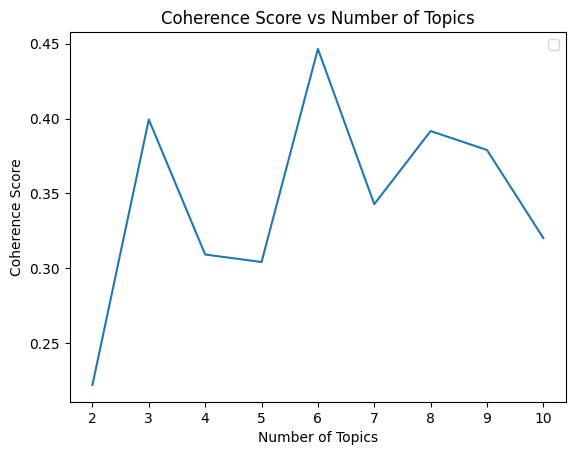

In [84]:
import matplotlib.pyplot as plt

plt.plot(range(min_topics, max_topics+1), list_of_coherence)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.legend()
plt.show()

In [85]:
best_coherence = max(list_of_coherence)

best_index = list_of_coherence.index(best_coherence)

best_num_topics = min_topics + best_index

print(
    f"Best number of topics: {best_num_topics} with coherence score: {best_coherence}"
)

Best number of topics: 6 with coherence score: 0.44648634817128857


In [86]:
lsa_model=models.LsiModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=best_num_topics,
)

lsa_model.print_topics(num_words=5)

[(0,
  '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'),
 (1,
  '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"'),
 (2,
  '-0.460*"saudi" + -0.264*"taliban" + 0.249*"weight" + -0.194*"afghanistan" + 0.191*"dr"'),
 (3,
  '-0.405*"weight" + -0.279*"dr" + -0.229*"mr" + -0.227*"diet" + -0.212*"saudi"'),
 (4,
  '0.270*"state" + -0.237*"trump" + -0.193*"show" + 0.187*"said" + -0.153*"saudi"'),
 (5,
  '-0.549*"trump" + 0.276*"mr" + -0.132*"support" + -0.122*"presid" + 0.122*"song"')]